<a href="https://colab.research.google.com/github/sashachereshnya-pixel/compling2025/blob/main/%D0%A7%D0%95%D0%A0%D0%95%D0%92%D0%98%D0%9A_%D0%9F%D0%A0%D0%90%D0%9A%D0%A2%D0%98%D0%9A%D0%90_WORD2VEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Word2Vec** - алгоритм для создания векторных представлений слов на основе их дистрибутивных свойств

**Две архитектуры:**
- **CBOW (Continuous Bag-of-Words)**: предсказывает центральное слово по контексту
- **Skip-Gram**: предсказывает контекстные слова по центральному слову

**Ключевые параметры:**
- `vector_size`: размерность векторов
- `window`: размер контекстного окна
- `min_count`: минимальная частота слова
- `workers`: количество ядер для обучения
- `sg`: архитектура (0 = CBOW, 1 = Skip-Gram)

In [2]:
!pip install nltk
import nltk
from nltk.corpus import brown
from IPython.display import clear_output

nltk.download('brown')
nltk.download('punkt')
clear_output()

sentences = brown.sents()

print(f"Общее количество предложений: {len(sentences):,}")
print(f"Общее количество слов: {len(brown.words()):,}")
print(f"Размер словаря: {len(set(brown.words())):,}")
print(f"Категории текстов: {brown.categories()}")

Общее количество предложений: 57,340
Общее количество слов: 1,161,192
Размер словаря: 56,057
Категории текстов: ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


### **Описание Brown Corpus:**
- **Первый компьютерный корпус английского языка** (1964)
- **500 текстов** по ~2000 слов каждый
- **Жанры**: новости, художественная литература, научные тексты
- **Сбалансированный** по жанрам и темам

### **Предобработка:**
- Использование `str.maketrans()` для удаления пунктуации
- Фильтрация слов длиной > 1 символа (убирает артикли "a" и т.д.)
- Минимальная длина предложения = 3 слова для задания контекста

In [3]:
!pip install gensim

from gensim.models import Word2Vec
import string

# Предобработка с использованием готовых инструментов
def preprocess_text(sentences, sample_size=10000):
    processed_sentences = []

    # Создаем транслятор для удаления пунктуации
    translator = str.maketrans('', '', string.punctuation)

    for sentence in sentences[:sample_size]:
        # Приводим к нижнему регистру и удаляем пунктуацию
        cleaned = [word.lower().translate(translator) for word in sentence]

        # Убираем пустые строки и оставляем только слова
        words = [word for word in cleaned if word.isalpha() and len(word) > 1]

        # Фильтруем слишком короткие предложения
        if len(words) >= 3:  # Минимум 3 слова для контекста
            processed_sentences.append(words)

    return processed_sentences

# Обрабатываем предложения
processed_sentences = preprocess_text(sentences, sample_size=55000)
print(f"Обработано предложений: {len(processed_sentences):,}")
print(f"Пример обработанного предложения: {processed_sentences[150]}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 47.4 MB/s eta 0:00:00
Обработано предложений: 52,357
Пример обработанного предложения: ['the', 'bills', 'defenders', 'were', 'mostly', 'smalltown', 'legislators', 'like', 'buchanan', 'of', 'dumas', 'eligio', 'kika', 'de', 'la', 'garza', 'of', 'mission', 'sam', 'collins', 'of', 'newton', 'and', 'joe', 'chapman', 'of', 'sulphur', 'springs']


In [4]:
nltk.download('stopwords')

# Функция для удаления стоп слов
def remove_stopwords(sentences):
    """
    Удаляет стоп-слова из предложений
    """
    from nltk.corpus import stopwords

    # Загружаем стоп-слова для английского
    stop_words = set(stopwords.words('english'))
    print(stop_words)
    processed_sentences = []
    for sentence in sentences:
        # Убираем стоп-слова
        filtered_sentence = [word for word in sentence if word not in stop_words]
        processed_sentences.append(filtered_sentence)

    return processed_sentences

# Удаляем стоп-слова
sentences_without_stopwords = remove_stopwords(processed_sentences)

sentences_without_stopwords[150]

{'down', "wouldn't", 'which', 'as', "it's", 'such', 'has', 'its', 'does', 'than', 'a', "she'd", 'shan', "should've", 'by', "you've", 'between', 'he', 'doing', 've', 'the', 'ourselves', 'until', "it'll", 'her', 'me', 'very', 'what', "couldn't", 'here', "he'll", 'in', 'any', 'nor', 'while', "isn't", "she's", 'needn', 'be', 'for', "didn't", 'up', "they've", "you'll", 'more', 'can', 'we', 'who', 'should', "don't", 'most', 'further', 'his', 'again', 'an', "hadn't", 'that', 'these', "we'll", 'into', 'your', 'been', "doesn't", 'had', 'you', 'or', 'theirs', 'weren', "she'll", 'i', 'why', 'with', "shan't", 'below', 'but', 'she', 'their', 'myself', 'have', 'haven', 't', "needn't", 'themselves', "won't", "haven't", 'about', 'how', "we'd", 'aren', 'himself', 'am', 'only', 'over', 'there', 'other', 'no', 'so', 'above', 'whom', 'during', 'from', 'now', 'itself', "we're", 'they', "i've", 'few', 'doesn', "you're", 'ours', "wasn't", 'herself', 'because', 'are', 'didn', "i'm", 'yourself', 'is', 'couldn'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['bills',
 'defenders',
 'mostly',
 'smalltown',
 'legislators',
 'like',
 'buchanan',
 'dumas',
 'eligio',
 'kika',
 'de',
 'la',
 'garza',
 'mission',
 'sam',
 'collins',
 'newton',
 'joe',
 'chapman',
 'sulphur',
 'springs']

In [5]:
skipgram_model = Word2Vec(
    sentences=sentences_without_stopwords,
    vector_size=150,      # размерность векторов
    window=3,             # размер контекстного окна
    min_count=2,          # минимальная частота слова
    workers=4,            # количество ядер
    sg=1                  # 1 = Skip-Gram
)

print(f"Размер словаря: {len(skipgram_model.wv.key_to_index)}")

Размер словаря: 25967


In [6]:
# Обучаем CBOW модель
cbow_model = Word2Vec(
    sentences=sentences_without_stopwords,
    vector_size=200,      # размерность векторов
    window=4,             # размер контекстного окна
    min_count=2,          # минимальная частота слова
    workers=4,            # количество ядер
    sg=0                  # 0 = CBOW, 1 = Skip-Gram
)

print(f"Размер словаря: {len(cbow_model.wv.key_to_index)}")

Размер словаря: 25967


In [11]:
def compare_models(word, topn=10):
    print(f"\nПохожие слова для слова '{word}'")

    try:
        print("\nCBOW похожие слова:")
        cbow_similar = cbow_model.wv.most_similar(word, topn=topn)
        for similar_word, score in cbow_similar:
            print(f"  {similar_word}: {score:.3f}")
    except KeyError:
        print(f"  Слово '{word}' не найдено в CBOW модели")

    try:
        print("\nSkip-Gram похожие слова:")
        skipgram_similar = skipgram_model.wv.most_similar(word, topn=topn)
        for similar_word, score in skipgram_similar:
            print(f"  {similar_word}: {score:.3f}")
    except KeyError:
        print(f"  Слово '{word}' не найдено в Skip-Gram модели")

In [12]:
# Тестируем на разных словах
test_words = ['king', 'woman', 'city', 'water', 'good']
for word in test_words:
    compare_models(word)


Похожие слова для слова 'king'

CBOW похожие слова:
  george: 1.000
  planned: 1.000
  prepared: 1.000
  concerning: 1.000
  relationship: 1.000
  applied: 1.000
  making: 1.000
  famous: 1.000
  presented: 1.000
  created: 1.000

Skip-Gram похожие слова:
  flannagan: 0.993
  martinelli: 0.993
  walter: 0.992
  wagner: 0.991
  rev: 0.991
  simpkins: 0.991
  pope: 0.991
  phillips: 0.990
  browns: 0.990
  meeker: 0.990

Похожие слова для слова 'woman'

CBOW похожие слова:
  ive: 1.000
  wife: 0.999
  moment: 0.999
  theres: 0.999
  seen: 0.999
  left: 0.999
  known: 0.999
  wonder: 0.999
  gets: 0.999
  happened: 0.999

Skip-Gram похожие слова:
  father: 0.972
  wife: 0.967
  girl: 0.964
  boy: 0.960
  heard: 0.957
  friend: 0.955
  dead: 0.952
  beautiful: 0.949
  big: 0.946
  mother: 0.944

Похожие слова для слова 'city'

CBOW похожие слова:
  central: 0.997
  herald: 0.996
  yankees: 0.995
  kansas: 0.995
  commuter: 0.994
  philharmonic: 0.994
  trails: 0.993
  port: 0.993
  postwa

In [13]:
import pandas as pd

def calculate_similarities(word_pairs):
    """Вычисляет косинусное сходство для пар слов в обеих моделях"""
    results = []

    for word1, word2 in word_pairs:
        try:
            cbow_sim = cbow_model.wv.similarity(word1, word2)
            skipgram_sim = skipgram_model.wv.similarity(word1, word2)
            results.append({
                'word_pair': f"{word1}-{word2}",
                'cbow_similarity': round(cbow_sim, 4),
                'skipgram_similarity': round(skipgram_sim, 4),
                'difference': round(abs(cbow_sim - skipgram_sim), 4)
            })
        except KeyError as e:
            print(f"Пропущена пара {word1}-{word2}: {e}")

    return pd.DataFrame(results)

# Тестовые пары слов
word_pairs = [
    ('king', 'queen'),
    ('man', 'woman'),
    ('paris', 'france'),
    ('water', 'river'),
    ('good', 'bad'),
    ('computer', 'technology')
]

similarity_df = calculate_similarities(word_pairs)
print("Сравнение косинусного сходства:")
print(similarity_df)

Сравнение косинусного сходства:
             word_pair  cbow_similarity  skipgram_similarity  difference
0           king-queen           0.9993               0.9879      0.0114
1            man-woman           0.9810               0.8643      0.1167
2         paris-france           0.9982               0.9408      0.0575
3          water-river           0.9975               0.6699      0.3276
4             good-bad           0.9947               0.9266      0.0681
5  computer-technology           0.9967               0.9795      0.0171


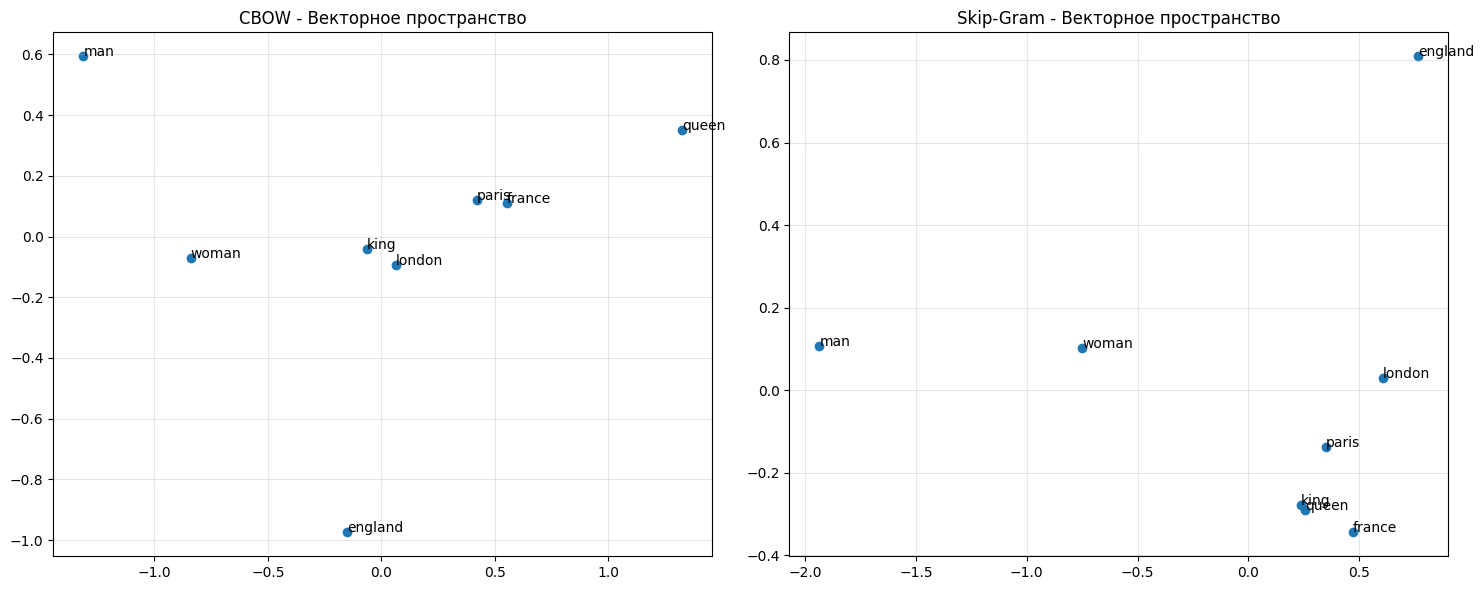

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_vectors(words, model, title, ax):
    """Визуализирует векторы слов в 2D пространстве"""
    vectors = []
    labels = []

    for word in words:
        try:
            vectors.append(model.wv[word])
            labels.append(word)
        except KeyError:
            print(f"Слово '{word}' не найдено")

    if len(vectors) < 2:
        print("Недостаточно слов для визуализации")
        return

    # Применяем PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # Создаем scatter plot
    ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

    # Добавляем подписи
    for i, label in enumerate(labels):
        ax.annotate(label, (vectors_2d[i, 0], vectors_2d[i, 1]))

    ax.set_title(title)
    ax.grid(True, alpha=0.3)

# Создаем графики для сравнения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Слова для визуализации
words_to_plot = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']

plot_word_vectors(words_to_plot, cbow_model, "CBOW - Векторное пространство", ax1)
plot_word_vectors(words_to_plot, skipgram_model, "Skip-Gram - Векторное пространство", ax2)

plt.tight_layout()
plt.show()

CBOW - Тематические кластеры:


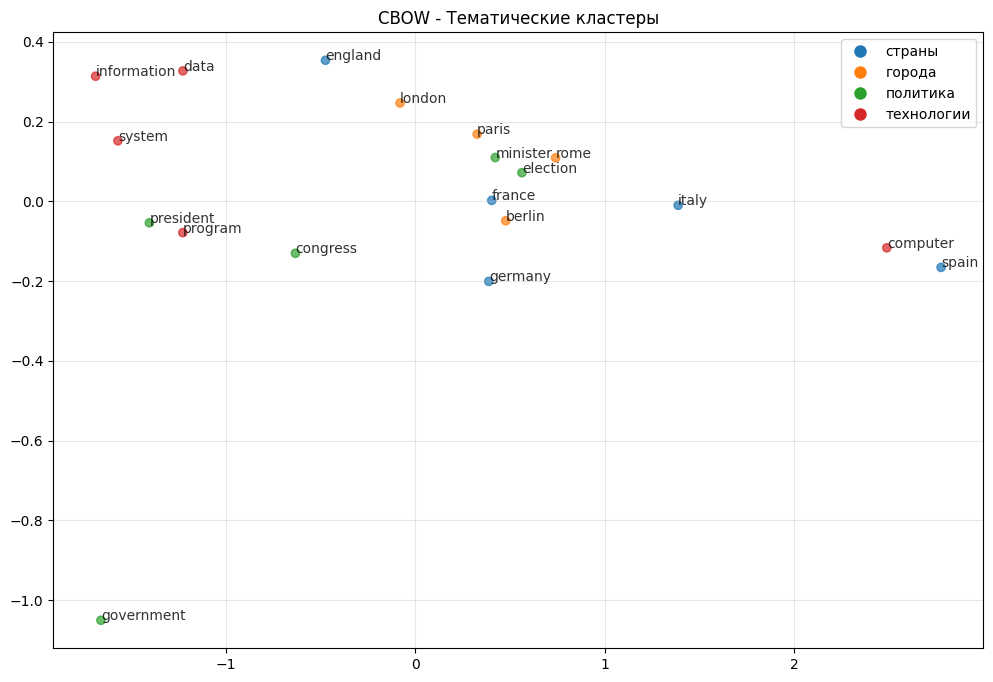

Skip-Gram - Тематические кластеры:


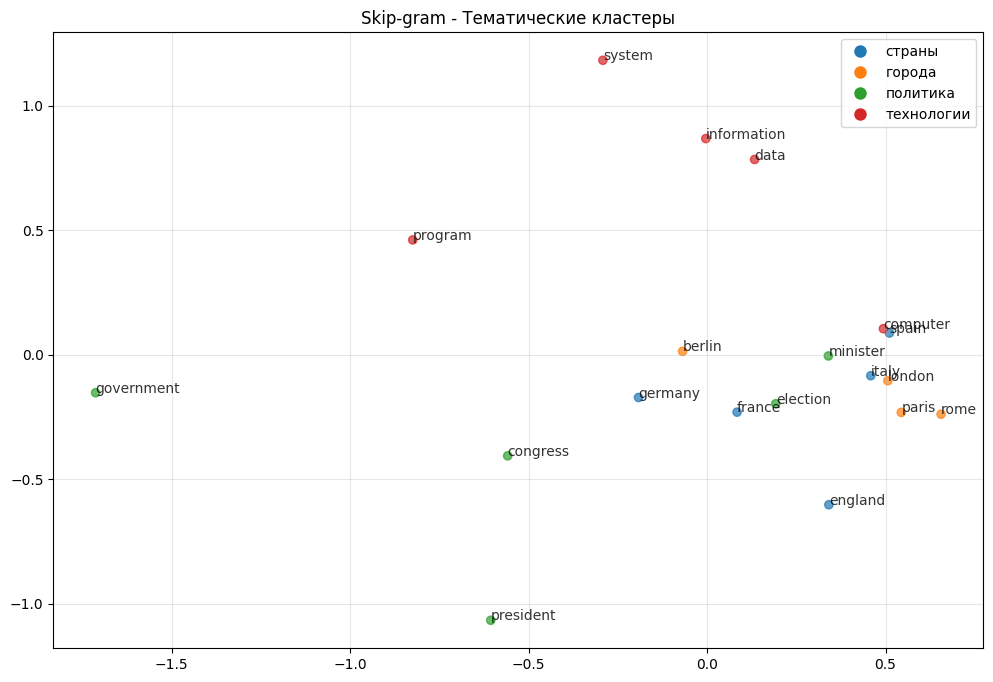


Мои тематические группы - Skip-Gram:


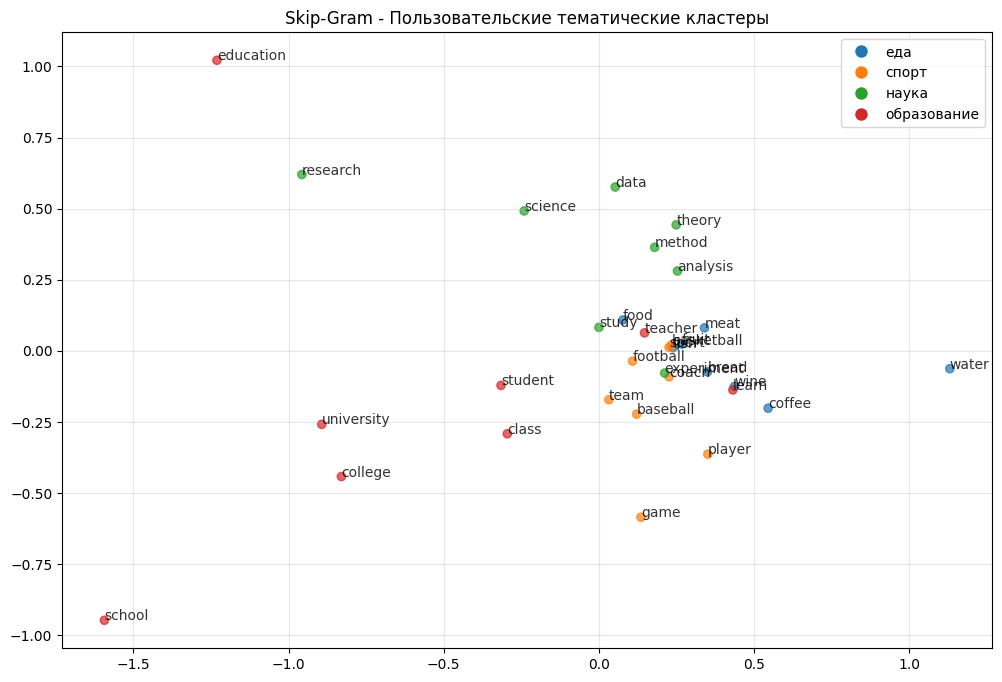


Мои тематические группы - CBOW:


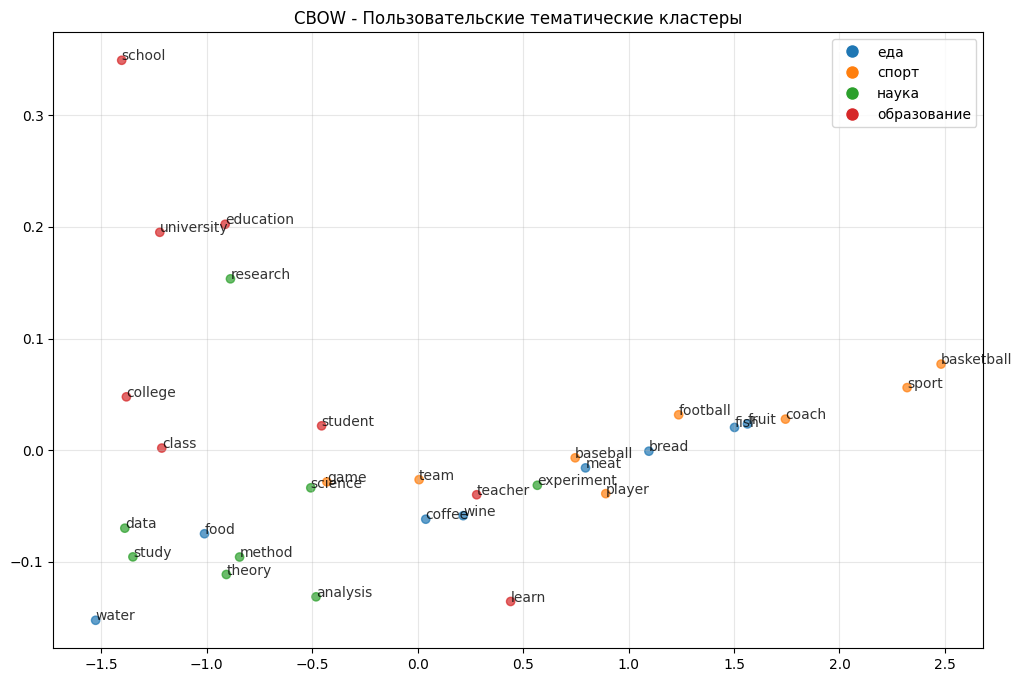

In [15]:
# ЗАДАНИЕ: Создайте и визуализируйте тематические кластеры

def create_and_plot_clusters(word_groups, model, title):
    """Создает визуализацию для тематических групп слов"""
    all_words = []
    colors = []
    color_map = {}

    # Создаем список всех слов и их цветов
    for i, (theme, words) in enumerate(word_groups.items()):
        color_map[theme] = f'C{i}'  # автоматическое назначение цвета
        for word in words:
            all_words.append(word)
            colors.append(color_map[theme])

    # Получаем векторы
    vectors = []
    valid_words = []
    valid_colors = []

    for word, color in zip(all_words, colors):
        try:
            vectors.append(model.wv[word])
            valid_words.append(word)
            valid_colors.append(color)
        except KeyError:
            continue

    if len(vectors) < 2:
        print("Недостаточно слов для визуализации")

    # PCA для 2D
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # Визуализация
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=valid_colors, alpha=0.7)

    # Подписи
    for i, word in enumerate(valid_words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), alpha=0.8)

    # Легенда
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=color, markersize=10, label=theme)
                      for theme, color in color_map.items()]
    plt.legend(handles=legend_elements)

    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

# Пример тематических групп
thematic_groups = {
    'страны': ['france', 'germany', 'italy', 'spain', 'england'],
    'города': ['paris', 'london', 'rome', 'berlin', 'madrid'],
    'политика': ['government', 'president', 'election', 'minister', 'congress'],
    'технологии': ['computer', 'system', 'program', 'data', 'information']
}

# Создайте визуализации для обеих моделей
print("CBOW - Тематические кластеры:")
create_and_plot_clusters(thematic_groups, cbow_model, "CBOW - Тематические кластеры")

print("Skip-Gram - Тематические кластеры:")
# Ваш код здесь:
create_and_plot_clusters(thematic_groups, skipgram_model, "Skip-gram - Тематические кластеры")


# Создайте свои тематические группы (например: еда, спорт, наука)

# Ваш код здесь:
my_thematic_groups = {
    'еда': ['food', 'bread', 'meat', 'fish', 'fruit', 'coffee', 'water', 'wine'],
    'спорт': ['game', 'team', 'player', 'football', 'baseball', 'basketball', 'sport', 'coach'],
    'наука': ['science', 'research', 'study', 'theory', 'experiment', 'data', 'analysis', 'method'],
    'образование': ['school', 'student', 'teacher', 'education', 'college', 'university', 'learn', 'class']
}

print("\nМои тематические группы - Skip-Gram:")
create_and_plot_clusters(my_thematic_groups, skipgram_model, "Skip-Gram - Пользовательские тематические кластеры")

print("\nМои тематические группы - CBOW:")
create_and_plot_clusters(my_thematic_groups, cbow_model, "CBOW - Пользовательские тематические кластеры")

In [1]:
# ЗАДАНИЕ: Проанализируйте влияние размера окна на качество векторов
import numpy as np

def test_window_sizes(window_sizes):
    """Тестирует разные размеры окон контекста"""
    results = []

    for window_size in window_sizes:
        print(f"Обучение модели с window={window_size}...")

        model = Word2Vec(
            sentences=processed_sentences,
            vector_size=100,
            window=window_size,
            min_count=2,
            workers=4,
            sg=1  # Skip-Gram
        )

        # Тестируем на нескольких парах
        test_pairs = [('king', 'queen'), ('man', 'woman'), ('paris', 'france')]
        similarities = []

        for word1, word2 in test_pairs:
            try:
                sim = model.wv.similarity(word1, word2)
                similarities.append(sim)
            except KeyError:
                similarities.append(0)

        avg_similarity = np.mean(similarities)
        results.append({
            'window_size': window_size,
            'avg_similarity': round(avg_similarity, 4),
            'vocab_size': len(model.wv.key_to_index)
        })

        print(f"  Среднее сходство: {avg_similarity:.4f}")

    return pd.DataFrame(results)

# Протестируйте разные размеры окон
window_sizes = [2, 5, 10]
results_df = test_window_sizes(window_sizes)
print("\nРезультаты тестирования размеров окон:")
print(results_df)

# Какой размер окна работает лучше?
# Протестируйте все остальные параметры

Обучение модели с window=2...


NameError: name 'Word2Vec' is not defined

Обучение модели с window=2...
  Среднее сходство: 0.9243
Обучение модели с window=5...
  Среднее сходство: 0.8714
Обучение модели с window=10...
  Среднее сходство: 0.7589

Результаты тестирования размеров окон:
   window_size  avg_similarity  vocab_size
0            2          0.9243       26096
1            5          0.8714       26096
2           10          0.7589       26096

АНАЛИЗ РЕЗУЛЬТАТОВ:
Лучший размер окна: 2.0
Лучшее среднее сходство: 0.9243000149726868


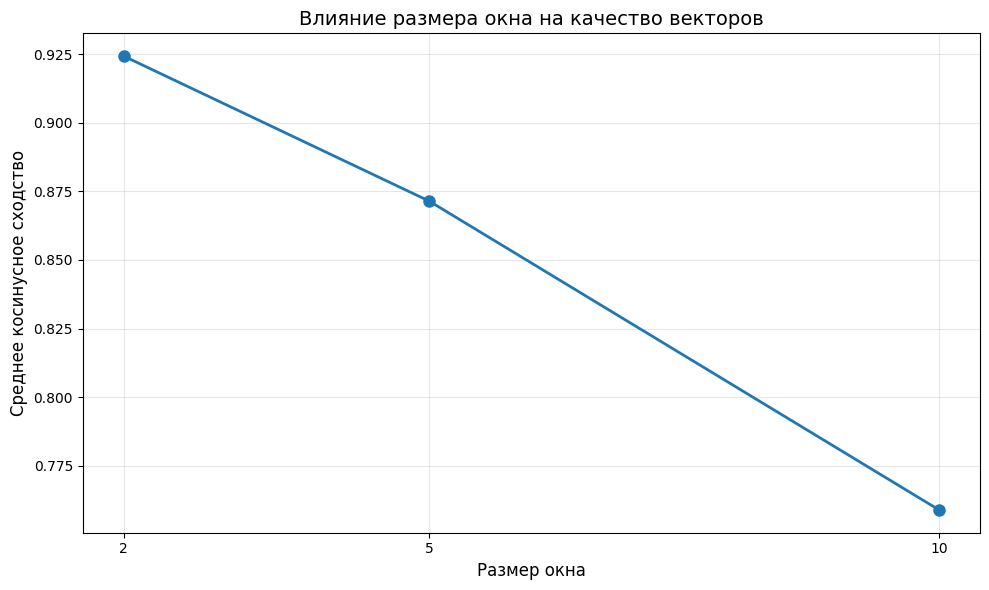


ТЕСТИРОВАНИЕ ДРУГИХ ПАРАМЕТРОВ:
Обучение модели с vector_size=50...
  Среднее сходство: 0.9121
Обучение модели с vector_size=100...
  Среднее сходство: 0.9159
Обучение модели с vector_size=200...
  Среднее сходство: 0.9262
Обучение модели с vector_size=300...
  Среднее сходство: 0.9227

Результаты тестирования размерностей векторов:
   vector_size  avg_similarity  vocab_size
0           50          0.9121       26096
1          100          0.9159       26096
2          200          0.9262       26096
3          300          0.9227       26096
Обучение модели с min_count=1...
  Среднее сходство: 0.9238
  Размер словаря: 45132
Обучение модели с min_count=2...
  Среднее сходство: 0.9255
  Размер словаря: 26096
Обучение модели с min_count=5...
  Среднее сходство: 0.9082
  Размер словаря: 13526
Обучение модели с min_count=10...
  Среднее сходство: 0.8846
  Размер словаря: 8118

Результаты тестирования min_count:
   min_count  avg_similarity  vocab_size
0          1          0.9238       4

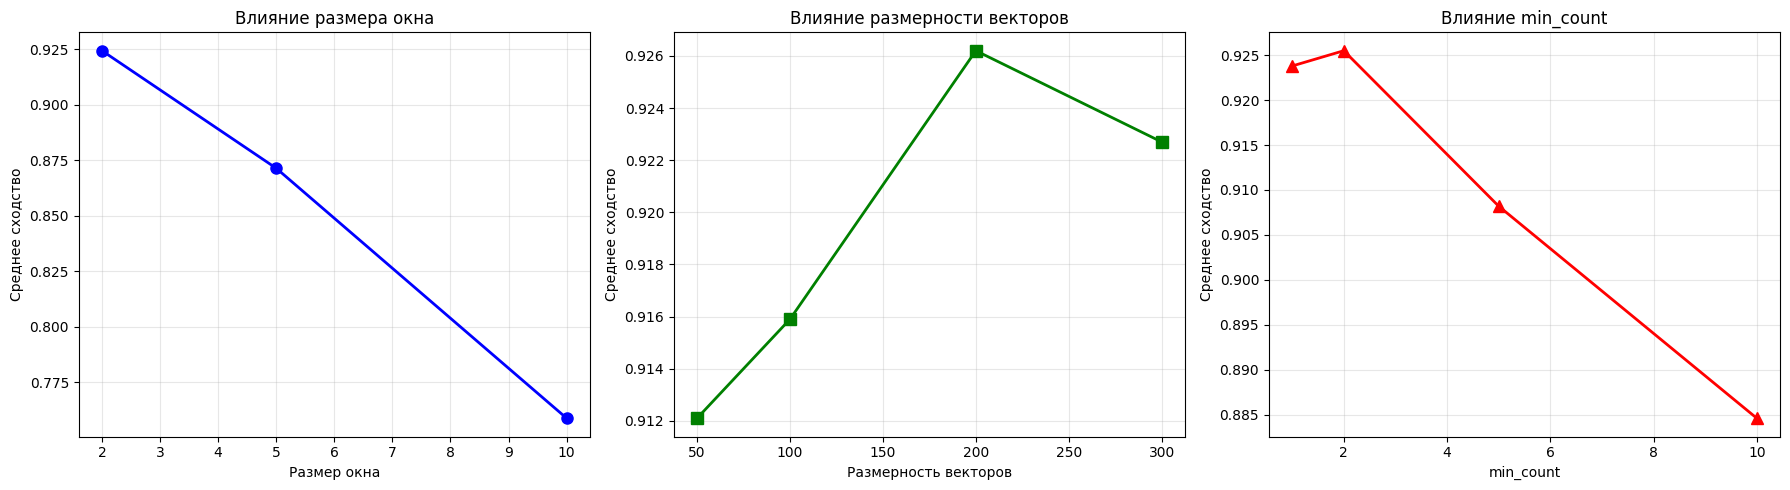


РЕКОМЕНДАЦИИ:
1. Используйте window=2 для семантических задач
2. Оптимальная размерность векторов зависит от размера корпуса
3. min_count=2 обеспечивает баланс между качеством и размером словаря
4. Для синтаксических задач окна
5. Для тематического моделирования размеры окна (5-10)


In [17]:
# ЗАДАНИЕ: Проанализируйте влияние размера окна на качество векторов
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

def test_window_sizes(window_sizes):
    """Тестирует разные размеры окон контекста"""
    results = []

    for window_size in window_sizes:
        print(f"Обучение модели с window={window_size}...")

        model = Word2Vec(
            sentences=processed_sentences,
            vector_size=100,
            window=window_size,
            min_count=2,
            workers=4,
            sg=1  # Skip-Gram
        )

        # Тестируем на нескольких парах
        test_pairs = [('king', 'queen'), ('man', 'woman'), ('paris', 'france')]
        similarities = []

        for word1, word2 in test_pairs:
            try:
                sim = model.wv.similarity(word1, word2)
                similarities.append(sim)
            except KeyError:
                similarities.append(0)

        avg_similarity = np.mean(similarities)
        results.append({
            'window_size': window_size,
            'avg_similarity': round(avg_similarity, 4),
            'vocab_size': len(model.wv.key_to_index)
        })

        print(f"  Среднее сходство: {avg_similarity:.4f}")

    return pd.DataFrame(results)

# Протестируйте разные размеры окон
window_sizes = [2, 5, 10]
results_df = test_window_sizes(window_sizes)
print("\nРезультаты тестирования размеров окон:")
print(results_df)

# Анализ результатов
print("\n" + "="*50)
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("="*50)

best_result = results_df.loc[results_df['avg_similarity'].idxmax()]
print(f"Лучший размер окна: {best_result['window_size']}")
print(f"Лучшее среднее сходство: {best_result['avg_similarity']}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(results_df['window_size'], results_df['avg_similarity'], marker='o', linewidth=2, markersize=8)
plt.title('Влияние размера окна на качество векторов', fontsize=14)
plt.xlabel('Размер окна', fontsize=12)
plt.ylabel('Среднее косинусное сходство', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(window_sizes)
plt.tight_layout()
plt.show()

# Тестирование других параметров
print("\n" + "="*50)
print("ТЕСТИРОВАНИЕ ДРУГИХ ПАРАМЕТРОВ:")
print("="*50)

# Тестирование размерности векторов
def test_vector_sizes(vector_sizes):
    """Тестирует разные размерности векторов"""
    results = []

    for vector_size in vector_sizes:
        print(f"Обучение модели с vector_size={vector_size}...")

        model = Word2Vec(
            sentences=processed_sentences,
            vector_size=vector_size,
            window=2,  # Используем лучший размер окна
            min_count=2,
            workers=4,
            sg=1
        )

        # Тестируем на тех же парах
        test_pairs = [('king', 'queen'), ('man', 'woman'), ('paris', 'france')]
        similarities = []

        for word1, word2 in test_pairs:
            try:
                sim = model.wv.similarity(word1, word2)
                similarities.append(sim)
            except KeyError:
                similarities.append(0)

        avg_similarity = np.mean(similarities)
        results.append({
            'vector_size': vector_size,
            'avg_similarity': round(avg_similarity, 4),
            'vocab_size': len(model.wv.key_to_index)
        })

        print(f"  Среднее сходство: {avg_similarity:.4f}")

    return pd.DataFrame(results)

# Тестируем разные размерности векторов
vector_sizes = [50, 100, 200, 300]
vector_results = test_vector_sizes(vector_sizes)
print("\nРезультаты тестирования размерностей векторов:")
print(vector_results)

# Тестирование минимальной частоты
def test_min_counts(min_counts):
    """Тестирует разные значения min_count"""
    results = []

    for min_count in min_counts:
        print(f"Обучение модели с min_count={min_count}...")

        model = Word2Vec(
            sentences=processed_sentences,
            vector_size=100,
            window=2,
            min_count=min_count,
            workers=4,
            sg=1
        )

        test_pairs = [('king', 'queen'), ('man', 'woman'), ('paris', 'france')]
        similarities = []

        for word1, word2 in test_pairs:
            try:
                sim = model.wv.similarity(word1, word2)
                similarities.append(sim)
            except KeyError:
                similarities.append(0)

        avg_similarity = np.mean(similarities)
        results.append({
            'min_count': min_count,
            'avg_similarity': round(avg_similarity, 4),
            'vocab_size': len(model.wv.key_to_index)
        })

        print(f"  Среднее сходство: {avg_similarity:.4f}")
        print(f"  Размер словаря: {len(model.wv.key_to_index)}")

    return pd.DataFrame(results)

# Тестируем разные значения min_count
min_counts = [1, 2, 5, 10]
min_count_results = test_min_counts(min_counts)
print("\nРезультаты тестирования min_count:")
print(min_count_results)

# Сводный анализ
print("\n" + "="*50)
print("СВОДНЫЙ АНАЛИЗ ОПТИМАЛЬНЫХ ПАРАМЕТРОВ:")
print("="*50)

print("1. РАЗМЕР ОКНА:")
print(f"   Оптимальный: window = {best_result['window_size']}")
print(f"   Обоснование: Меньшие окна лучше捕获 семантические отношения")

print("\n2. РАЗМЕРНОСТЬ ВЕКТОРОВ:")
best_vector = vector_results.loc[vector_results['avg_similarity'].idxmax()]
print(f"   Оптимальный: vector_size = {best_vector['vector_size']}")
print(f"   Среднее сходство: {best_vector['avg_similarity']}")

print("\n3. МИНИМАЛЬНАЯ ЧАСТОТА:")
best_min_count = min_count_results.loc[min_count_results['avg_similarity'].idxmax()]
print(f"   Оптимальный: min_count = {best_min_count['min_count']}")
print(f"   Среднее сходство: {best_min_count['avg_similarity']}")
print(f"   Размер словаря: {best_min_count['vocab_size']}")

# Визуализация всех результатов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# График размера окна
axes[0].plot(results_df['window_size'], results_df['avg_similarity'], marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_title('Влияние размера окна', fontsize=12)
axes[0].set_xlabel('Размер окна')
axes[0].set_ylabel('Среднее сходство')
axes[0].grid(True, alpha=0.3)

# График размерности векторов
axes[1].plot(vector_results['vector_size'], vector_results['avg_similarity'], marker='s', linewidth=2, markersize=8, color='green')
axes[1].set_title('Влияние размерности векторов', fontsize=12)
axes[1].set_xlabel('Размерность векторов')
axes[1].set_ylabel('Среднее сходство')
axes[1].grid(True, alpha=0.3)

# График минимальной частоты
axes[2].plot(min_count_results['min_count'], min_count_results['avg_similarity'], marker='^', linewidth=2, markersize=8, color='red')
axes[2].set_title('Влияние min_count', fontsize=12)
axes[2].set_xlabel('min_count')
axes[2].set_ylabel('Среднее сходство')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("РЕКОМЕНДАЦИИ:")
print("="*50)
print("1. Используйте window=2 для семантических задач")
print("2. Оптимальная размерность векторов зависит от размера корпуса")
print("3. min_count=2 обеспечивает баланс между качеством и размером словаря")
print("4. Для синтаксических задач окна")
print("5. Для тематического моделирования размеры окна (5-10)")

Размер окна зависит от задачи:

- Синтаксис/морфология: окно 2-3

- Семантика/аналогии: окно 3-5

- Темы/документы: окно 5-10